# プログラミング環境の構築

## Anacondaのインストール

既に「プログラミング基礎」の授業内でAnacondaをインストールしているはずなので，以下ではインストールの概要だけ述べる．詳細は[Python.jp](https://www.python.jp/install/anaconda/windows/install.html)や[Let'sプログラミング](https://www.javadrive.jp/python/install/index5.html)などが参考になる．

- [Anacondaの公式サイト](https://www.anaconda.com/products/individual)にアクセスする
- 下にスクロールし，"Anaconda Installers"から環境に応じたインストーラをダウンロードする
- ダウンロードしたインストーラをクリックし，画面の指示に従う
    - 途中で，`add Anaconda to the system Pass environment variable`にチェックを入れてPathの設定を行う
- Anaconda Navigatorが使えるか確認する

## 作業フォルダの作成

データ分析では，様々なファイルを扱わなければならない．
例えば，本講義では，Pythonのソースコード（`.py`），Jupyter NoteBook（`.ipynb`），データ（`.csv`），図（`.pdf`や`.png`）などのファイルを扱うことになる．
これらのファイルが自分のPC内のどこに保存されているかを把握しておかないと，ファイルを探すだけで時間を取られてしまい，時間の無駄である．
データ分析を始める際にまず行うべきことは，PC内のフォルダやファイルを整理することである．

まず本講義専用の作業フォルダを作成する（名前は自分で分かれば何でも良い）．
作業フォルダの作成場所はできればOneDriveやGoogle Driveの中に作ることを推奨する（こうすれば，自動的にクラウド上にバックアップされる）．

ここでは，`ローカルディスク（C:）>ユーザー>username>OneDrive`の中に`work`という作業フォルダを作ったとする：
```
[OneDrive]
    - [デスクトップ]
    - [ドキュメント]
    ...
    - [work]

```

本講義で扱うファイルは全てこの`work`の中に保存する．
`work`フォルダの中身は次のように章ごとのサブフォルダやレポート用のフォルダに分けておくと良い：
```
[work]
    - [1_introduction]
    - [2_environment]
        - 2_environment.ipynb
    - [report]
    - [others]
```

## Jupyter Lab

Anacondaをインストールすると，自動的にJupyter NotebookとJupyter Labが使えるようになる．
本講義ではJupyter Labの方を用いる．

**Jupyter Labの起動**

- Anaconda Navigatorを起動
    - ［スタートメニュー］→［Anaconda Navigator (anaconda3)］
- ［Jupyter Lab］をクリック

**ノートブック（.ipynbファイル）の起動**

- `.ipynb`ファイルをダウンロードし，作業フォルダに保存する．
    - 講義ノート上部のアイコンから`.ipynb`をクリック
    - 自動保存された場合は`ダウンロード`フォルダ内に保存されているはず
- Jupyter Labを起動し，左上のフォルダアイコンをクリックする．
- .ipynbファイルを保存した作業フォルダに移動し，`.ipynb`ファイルをダブルクリックする．

## パス（Path）について

### パスとは何か？
Pythonプログラムの実行，自分のPC上のファイルの読み込み，加工したデータの保存を行うには，対象となるファイルの在り処，つまりアドレスが分からないといけない．
このアドレスを指定する文字列のことをパス（Path）と呼ぶ．
Windowsの場合，パスはフォルダの階層構造を区切り文字`¥`（またはバックスラッシュ`\`）によって区切った形式で以下のように表される：

```
C:¥ユーザー¥ドキュメント
```

フォルダの階層の区切りは`¥`（またはバックスラッシュ`\\`）によって表されており，`¥`の隣にはフォルダの名前が記載されている．
上の例は，Cドライブ（`C:`）の中にある`ユーザー`フォルダの中の`ドキュメント`フォルダのパスを表す．

### 相対パスと絶対パス
パスには相対パスと絶対パスの2種類が存在する．
パスを使用する場面の具体例として，matplotlibで描画した図を指定したフォルダ内に保存する場合を考える．
まず，以下のプログラムを実行する．

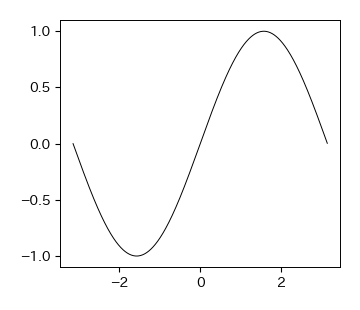

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3.5, 3))
x = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x, np.sin(x))

実行がうまくいけば，サイン関数が出力されるはずである．
出力された図を自分の作業フォルダに保存するには，`fig.savefig(path)`のように保存先のパスを指定すれば良い．
このとき，パスの指定方法には以下の２つの方法が存在する．

**1. 絶対パスによる指定**

In [ ]:
fig.savefig('/Users/narizuka/work/document/lecture/rissho/sport_programming/book/chap_2/graph.pdf')

この方法では，最も上の階層であるドライブ名（ここではCドライブ）から始まるパスを指定しており，これを**絶対パス**と呼ぶ．
Windowsで絶対パスを取得するには，パスをコピーしたいファイルやフォルダを右クリックし，「パスのコピー」を選択すれば良い．
絶対パスを使っておけばエラーは出にくいが，PCの奥深くにあるフォルダだとパスが長くなるという問題がある．

なお，Windows環境においてパスをコピーして貼り付けると区切り文字がバックスラッシュ`\`または`¥`になるはずである．
ところが，pythonではバックスラッシュ`\`と文字を組み合わせたエスケープシーケンスいう特別な文字列が存在し，例えば，`\n`は改行，`\t`はタブを表すエスケープシーケンスとなる．
これにより，上の例の中にある`\t`の部分はパスの区切りではなくエスケープシーケンスとして認識され，エラーが出ることがある（特に，pythonでファイルの入出力を行うとき）．
これを回避するには以下のように先頭に`r`を付ける
```
r"C:\ユーザー\ユーザー名\OneDrive\sport_data"
```
これは，raw文字列と呼ばれ，""の中に指定した文字列をそのままの形で認識させることができる．

**2.相対パスによる指定**

In [ ]:
fig.savefig("./graph2.pdf")

2つ目の方法では，パスが`'.'`から始まっているが，これは現在の居場所（**カレントディレクトリ**と呼ぶ）のパスを意味する．
デフォルトではカレントディレクトリは`.ipynb`ファイルが保存されているフォルダとなる．
このように，カレントディレクトリのパス`'.'`から始まるパスを**相対パス**と呼ぶ．
カレントディレクトリは以下のコマンドにより任意のフォルダに変更することができる．

```python
import os
os.chdir(path)
```

相対パスを用いると，パスが短くなるので便利であるが，カレントディレクトリがどこなのかを認識しておく必要がある．